# Importing libraries

In [1]:
# Data handling and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split

# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression

# Accuracy
from sklearn.metrics import accuracy_score

# Importing modules
import sys
import os

# Add the src path to sys.path
sys.path.append(os.path.abspath('../src'))

# Module
from modules.data_handling import na_calculator, imputing_missing_data, train_test_pred
from modules.visualisation import bar_plot, groupped_bar, avg_income, correlation_matrix

# Warning handler
import warnings
warnings.simplefilter('ignore')

# Importing data

In [2]:
train = pd.read_csv(r'../data/train.csv')
test = pd.read_csv(r'../data/test.csv')

# Making a copy of the original data:
train_original = train.copy()
test_original = test.copy()

# Checking training data
train.iloc[:5]

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
# Checking testing data
test.iloc[:5]

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

# Type of variables
## Categorical variables  

- ```Loan_ID```
- ```Gender```
- ```Married```
- ```Dependents```
- ```Education```
- ```Self_Employed```
- ```Loan_Status```
    
## Numerical variables

- ```ApplicantIncome```
- ```CoapplicantIncome```
- ```LoanAmount```
- ```Loan_Amount_Term```
- ```Credit_History```
- -```Property_Area```

## Univariate Analysis

- ***```Loan_Status```***: As the variable is categorical in nature, its frequency distribution, percentage breakdown, and corresponding bar plot are examined below to provide a clearer understanding of its characteristics.

# Graph Analysis - Checking frequency

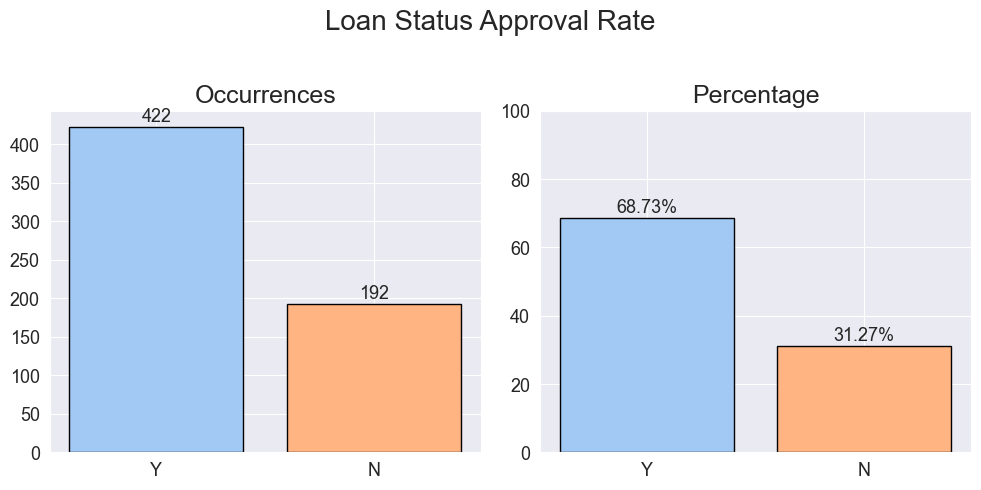

In [4]:
# PLOTTING THE VALUES AND PERCENTAGES
fig = plt.figure(figsize=(10, 5))
plt.suptitle('Loan Status Approval Rate', fontsize=20)

# Left subplot: Occurrences
plt.subplot(1, 2, 1)
bar_plot(train["Loan_Status"], "v", "f")
plt.title('Occurrences')

# Right subplot: Percentages
plt.subplot(1, 2, 2)
bar_plot(train["Loan_Status"], "v", "p")
plt.title('Percentage')

# Adjust layout only once at the end
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect to avoid overlap with suptitle

# Saving the images
plt.savefig('../images/1_Loan_Status.png', dpi=300, bbox_inches='tight')

The distribution of loan approvals shows that approximately ```69%``` of applicants were approved. Out of a total of ```614``` applicants ```442``` received approval (```192``` denied). This indicates that the majority of applicants were successful in obtaining the loan. Also, this means the dataframe is ```imbalanced``` because ***the approval rate almost doubles the rejection rate***. Taking a look at the variables separately provides a better understanding of this analysis.

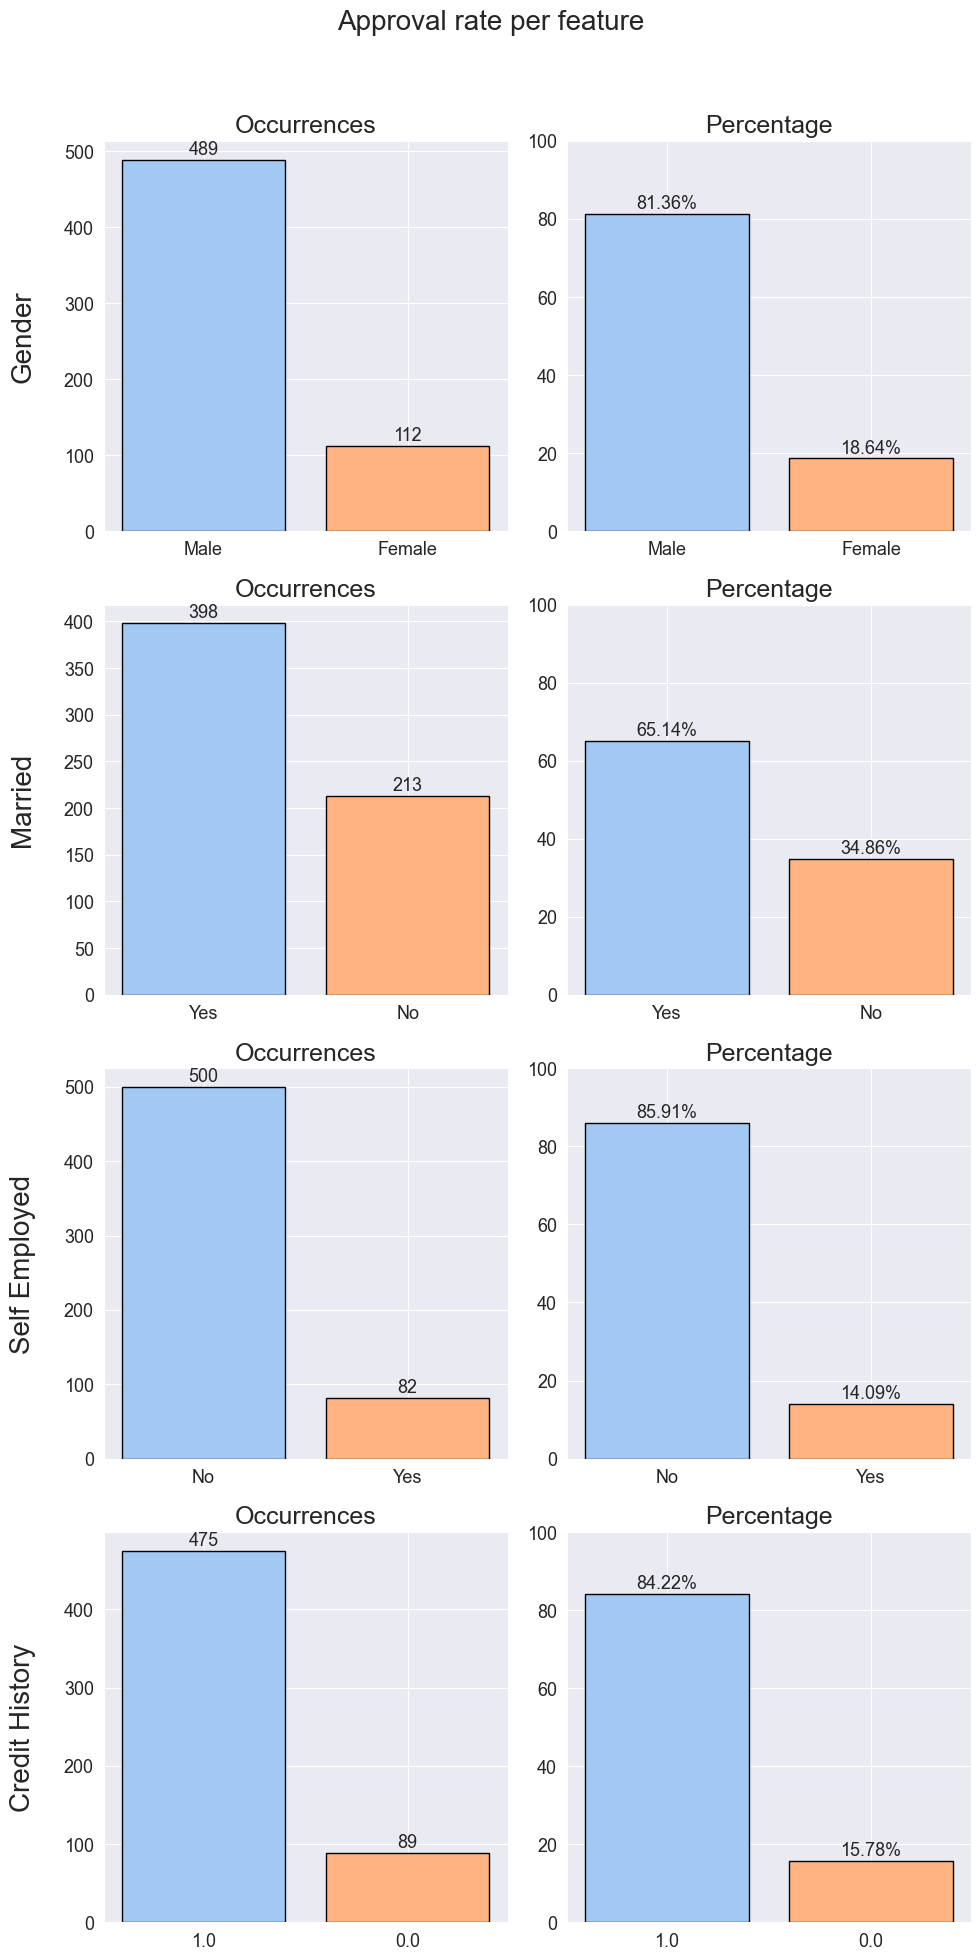

In [5]:
fig = plt.figure(figsize=(10, 20))  # Adjusted height for better spacing
plt.suptitle('Approval rate per feature', fontsize=20)

# Gender
plt.subplot(4, 2, 1)
bar_plot(train["Gender"], "v", "f")
plt.title('Occurrences')
plt.ylabel('Gender', fontsize=20, rotation=90, labelpad=20)

plt.subplot(4, 2, 2)
bar_plot(train["Gender"], "v", "p")
plt.title('Percentage')

# Married
plt.subplot(4, 2, 3)
bar_plot(train["Married"], "v", "f")
plt.title('Occurrences')
plt.ylabel('Married', fontsize=20, rotation=90, labelpad=20)

plt.subplot(4, 2, 4)
bar_plot(train["Married"], "v", "p")
plt.title('Percentage')

# Self Employed
plt.subplot(4, 2, 5)
bar_plot(train["Self_Employed"], "v", "f")
plt.title('Occurrences')
plt.ylabel('Self Employed', fontsize=20, rotation=90, labelpad=20)

plt.subplot(4, 2, 6)
bar_plot(train["Self_Employed"], "v", "p")
plt.title('Percentage')

# Credit History
plt.subplot(4, 2, 7)
bar_plot(train["Credit_History"], "v", "f")
plt.title('Occurrences')
plt.ylabel('Credit History', fontsize=20, rotation=90, labelpad=20)

plt.subplot(4, 2, 8)
bar_plot(train["Credit_History"], "v", "p")
plt.title('Percentage')

# Adjust layout to avoid overlap with suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Saving the images
plt.savefig('../images/2_features.png', dpi=300, bbox_inches='tight')

Based on the insights derived from the bar plots above, we observe the following trends in the dataset:

- A significant majority, approximately ```81%```, of the applicants are male.
- Around ```65%``` of the applicants are married, suggesting a strong marital trend within the group.
- About ```14%``` of the applicants report being self-employed, highlighting a relatively small yet notable portion of independent workers.
- A large portion, roughly ```84%```, of the applicants have successfully repaid their debts, indicating a generally positive repayment behaviour.

Next, we will explore the distribution of the ordinal variables, namely ```Dependents```, ```Education```, and ```Property_Area```, to further understand their impact as well.

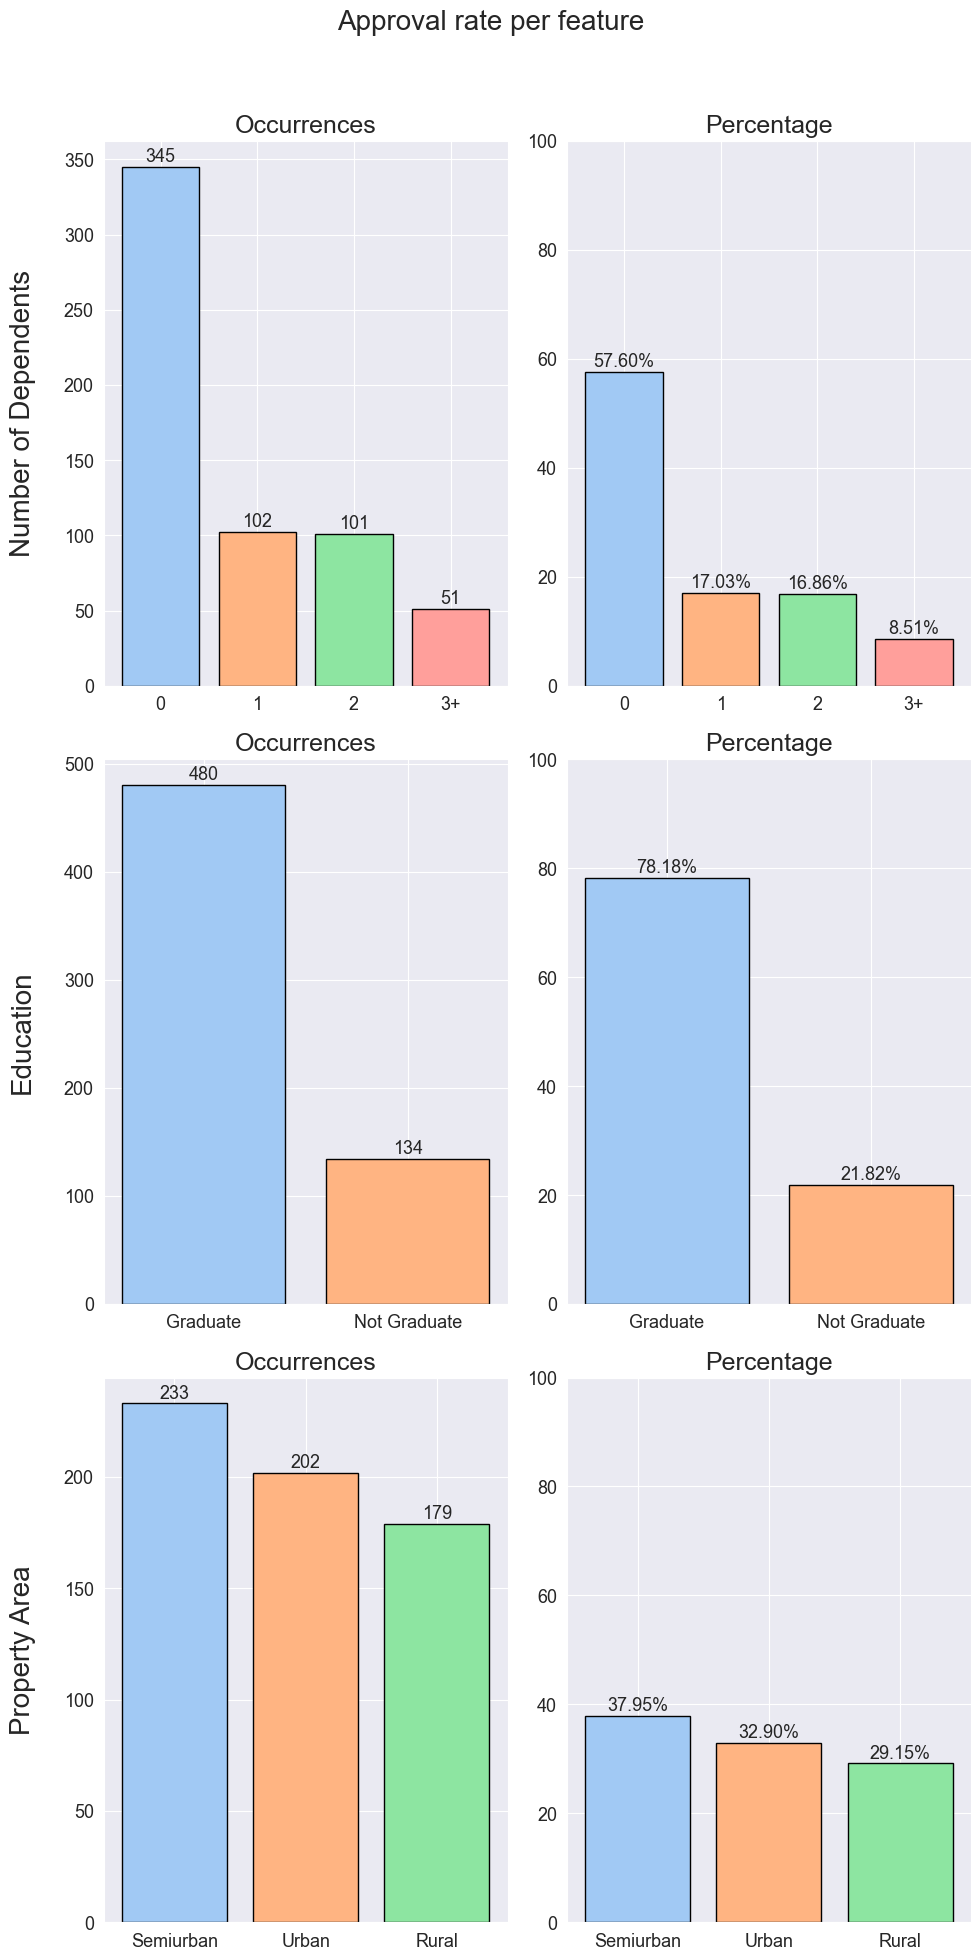

In [6]:
fig = plt.figure(figsize=(10, 20))  # Adjusted height for better spacing
plt.suptitle('Approval rate per feature', fontsize=20)

# Dependents
plt.subplot(3, 2, 1)
bar_plot(train["Dependents"], "v", "f")
plt.title('Occurrences')
plt.ylabel('Number of Dependents', fontsize=20, rotation=90, labelpad=20)

plt.subplot(3, 2, 2)
bar_plot(train["Dependents"], "v", "p")
plt.title('Percentage')

# Education
plt.subplot(3, 2, 3)
bar_plot(train["Education"], "v", "f")
plt.title('Occurrences')
plt.ylabel('Education', fontsize=20, rotation=90, labelpad=20)

plt.subplot(3, 2, 4)
bar_plot(train["Education"], "v", "p")
plt.title('Percentage')

# Property Area
plt.subplot(3, 2, 5)
bar_plot(train["Property_Area"], "v", "f")
plt.title('Occurrences')
plt.ylabel('Property Area', fontsize=20, rotation=90, labelpad=20)

plt.subplot(3, 2, 6)
bar_plot(train["Property_Area"], "v", "p")
plt.title('Percentage')

# Adjust layout to avoid overlap with suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Saving the images
plt.savefig('../images/3_features.png', dpi=300, bbox_inches='tight')

The analysis reveals several notable trends: 

- Firstly, the majority of applicants do not have dependents, indicating a predominance of single or smaller households among the applicants.
- Secondly, approximately ```79%``` of the applicants are graduates, suggesting a generally well-educated applicant pool.
- Lastly, most applicants originate from semi-urban areas, reflecting a regional concentration that could influence loan approval patterns.

The next step involves examining the relationship between the target variable (```Loan_Status```) and the categorical independent variables. A grouped bar chart provides insight into the proportion of approved versus unapproved loans across different categories.

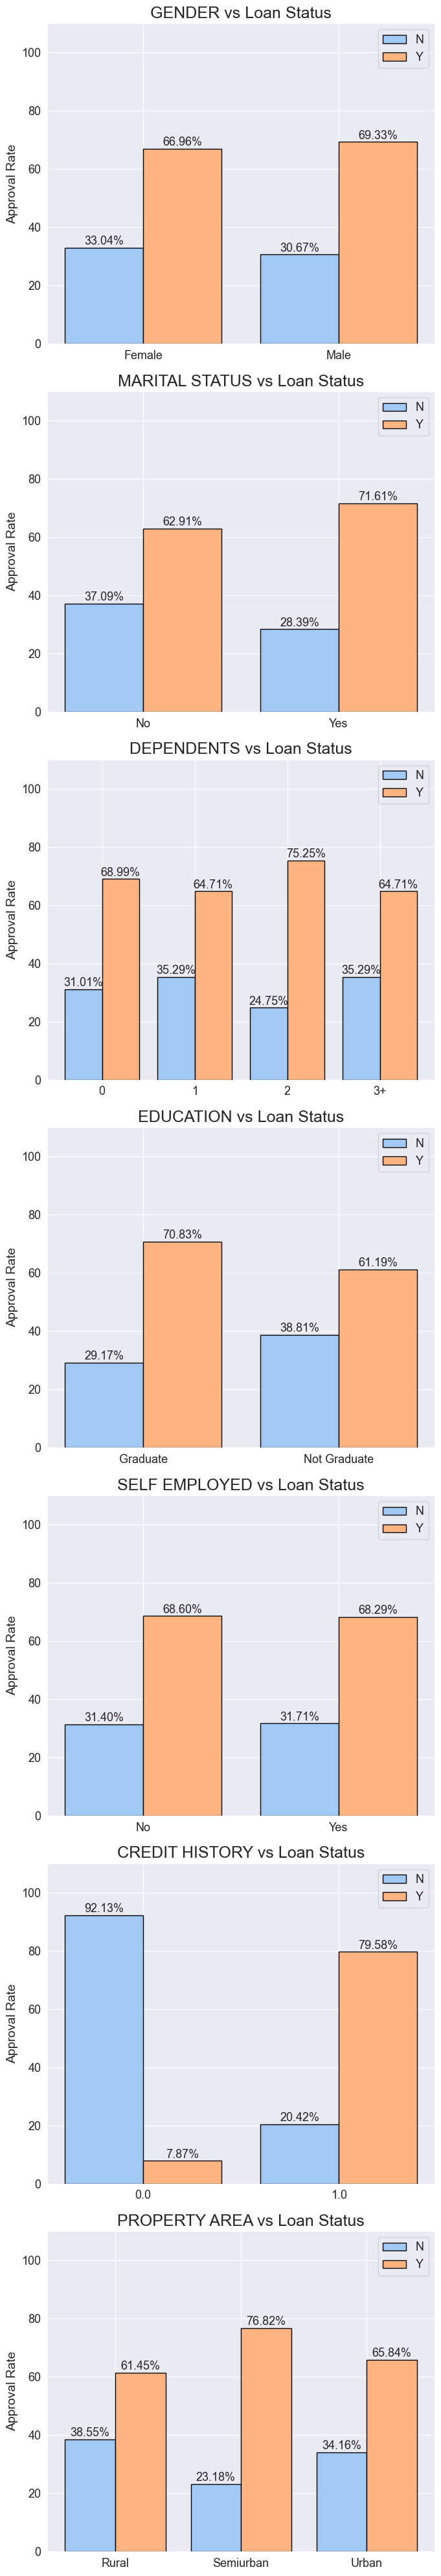

In [7]:
# Creating a cross table to grapsh
gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
married=pd.crosstab(train['Married'],train['Loan_Status']) 
dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
education=pd.crosstab(train['Education'],train['Loan_Status']) 
self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 

fig=plt.figure(figsize=(7,40))
plt.subplot(7,1,1)
groupped_bar(gender,"GENDER", "p")

plt.subplot(7,1,2)
groupped_bar(married, "MARITAL STATUS", "p")

plt.subplot(7,1,3)
groupped_bar(dependents, "DEPENDENTS", "p")

plt.subplot(7,1,4)
groupped_bar(education, "EDUCATION", "p")

plt.subplot(7,1,5)
groupped_bar(self_Employed, "SELF EMPLOYED", "p")

plt.subplot(7,1,6)
groupped_bar(Credit_History, "CREDIT HISTORY", "p")

plt.subplot(7,1,7)
groupped_bar(Property_Area, "PROPERTY AREA", "p")

# Saving the images
plt.savefig('../images/4_grouped.png', dpi=300, bbox_inches='tight')

The analysis indicates:

- The loan approval rate is around the same for both genders.
- A higher proportion of married applicants tend to receive loan approval.
- The distribution of applicants with one or three, or more, dependents is consistent across both approved and non-approved loan categories.
- No significant insight is evident from the relationship between self-employment status and loan approval.
- Applicants with a credit history of one are considerably more likely to have their loans approved.
- Loan approval rates are relatively higher in semi-urban areas compared to rural and urban locations.

Now, the applicant's income analysis compares those with approved loans to those whose applications were not approved.

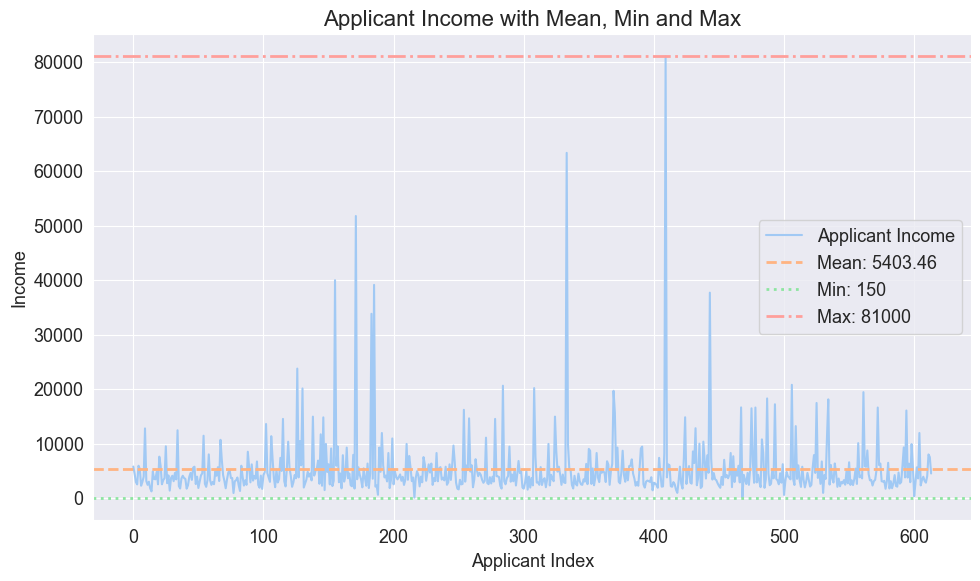

In [8]:
# Analysing applicant income:
avg_income('Applicant', train['ApplicantIncome'])

# Saving the images
plt.savefig('../images/5_applicant_income.png', dpi=300, bbox_inches='tight')

The plot indicates the presence of outliers within the dataset. The mean income is approximately ```£5,403.46```, while the maximum and minimum values are around ```£81,000``` and ```£150```, respectively, suggesting a substantial spread and the potential influence of extreme values on the overall distribution. Now, let us check the income vs approval rate:

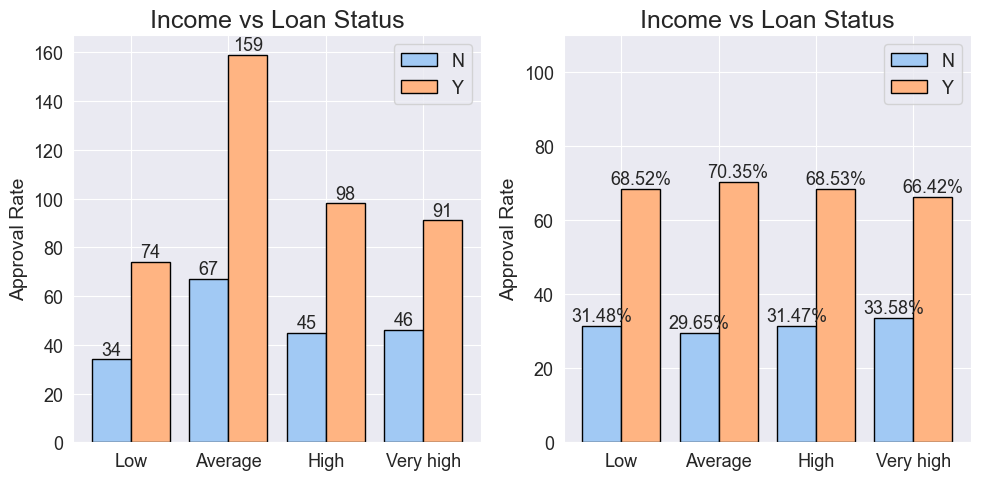

In [9]:
# Data
bins = [0, 2500, 4000, 6000, 81000] 
label =['Low','Average','High', 'Very high'] 
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = label) 
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status']) 

# Graph (values)
plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
groupped_bar(Income_bin, "Income")

# Graph (percentages)
plt.subplot(1, 2, 2)
groupped_bar(Income_bin, "Income", "p")
plt.tight_layout()

# Saving the images
plt.savefig('../images/6_applicant_income_comparison.png', dpi=300, bbox_inches='tight')

It may be inferred that the applicant’s income does not significantly influence the likelihood of loan approval, which contradicts the initial hypothesis that a higher income would correlate with an increased probability of approval. A similar analytical approach will be applied to examine the relationship between the applicant’s income and the loan amount.

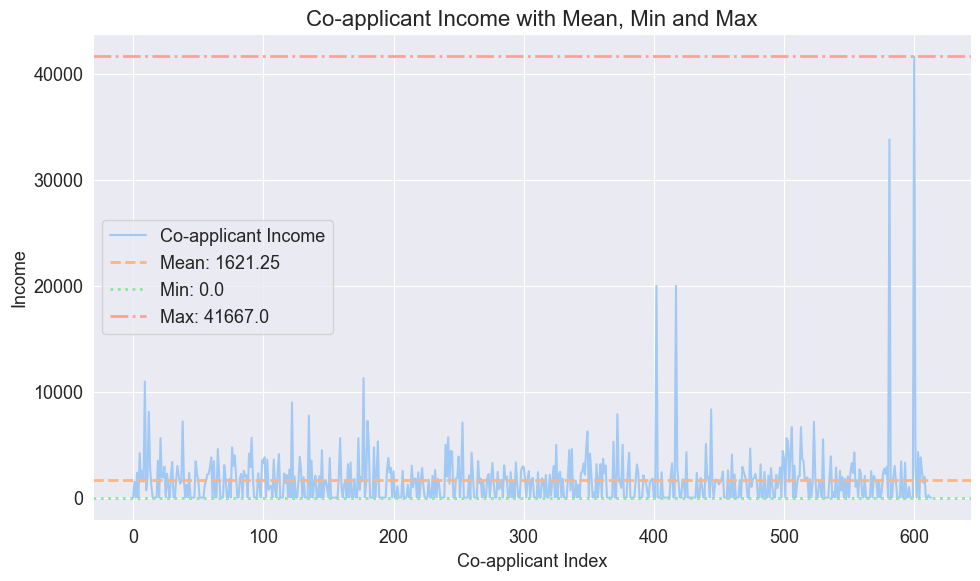

In [10]:
# Analysing co-applicant income:
avg_income('Co-applicant', train['CoapplicantIncome'])

# Saving the images
plt.savefig('../images/7_co-applicant_income.png', dpi=300, bbox_inches='tight')

The presence of outliers is evident in the data. While the mean value is ```£1,621.25```, the minimum is ```£0.0``` and the maximum is ```£41,667.0```, indicating a wide range and significant deviation from the average. This pattern strongly suggests the existence of outliers, which is further illustrated in the following plot.

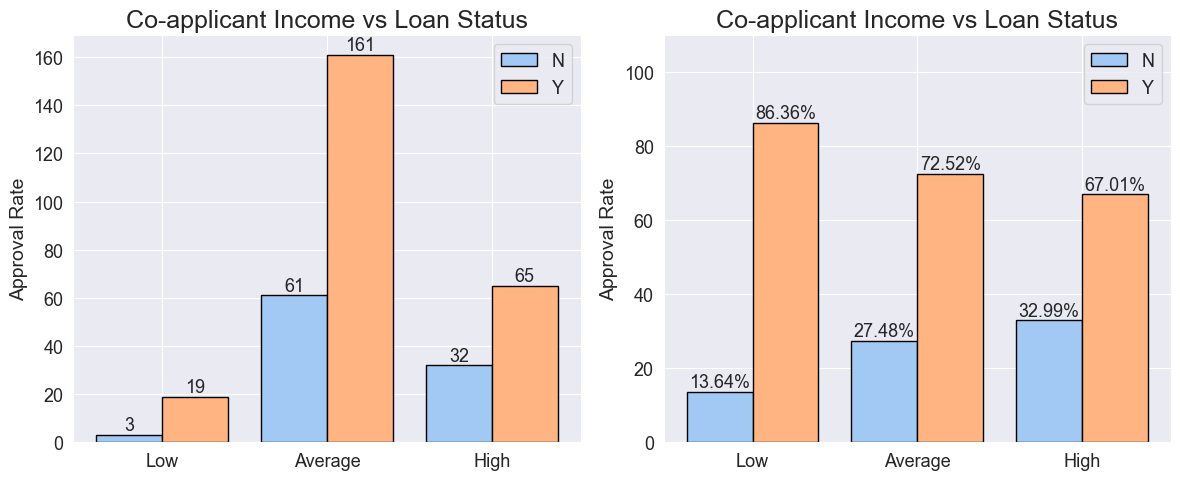

In [11]:
# Data
bins_1 = [0, 1000, 3000, 42000]
label = ['Low','Average','High'] 
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins_1, labels = label)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])

# Graph (values)
plt.figure(figsize =(12, 5))
plt.subplot(1, 2, 1)
groupped_bar(Coapplicant_Income_bin, "Co-applicant Income")

# Graph (percentages)
plt.subplot(1, 2, 2)
groupped_bar(Coapplicant_Income_bin, "Co-applicant Income", "p")

# Saving the images
plt.savefig('../images/8_co-applicant_income_comparison.png', dpi=300, bbox_inches='tight')

The initial analysis suggests a higher likelihood of loan approval when the co-applicant’s income is lower. However, this observation appears counterintuitive. A plausible explanation is that a significant proportion of applicants do not have a co-applicant, resulting in a co-applicant income of zero, which may distort the relationship. Consequently, it is appropriate to create a new variable by combining the incomes of both the primary applicant and the co-applicant. This will enable a more accurate assessment of the total income’s influence on loan approval status.

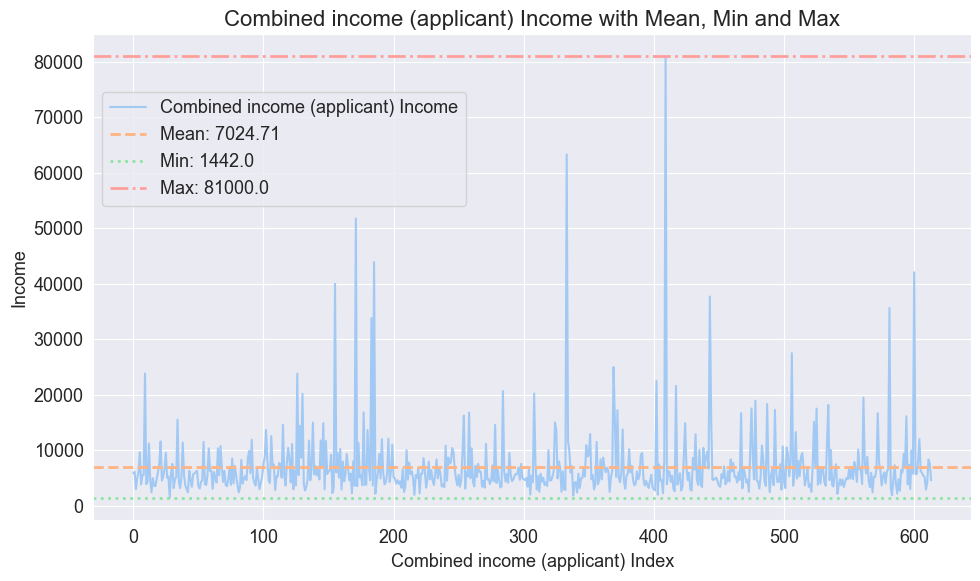

In [12]:
# Analysing combine income:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
avg_income('Combined income (applicant)', train['Total_Income'])

# Move legend slightly up by changing the y-coordinate
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9)) 

# Saving the images
plt.savefig('../images/9_combined_income.png', dpi=300, bbox_inches='tight')

The presence of outliers is still evident in the data distribution. While the mean value is ```£7,024.71```, the minimum and maximum values are ```£1,442.0``` and ```£81,000.0``` respectively, indicating a wide spread that suggests the influence of extreme values. This pattern is clearly illustrated in the following plot.

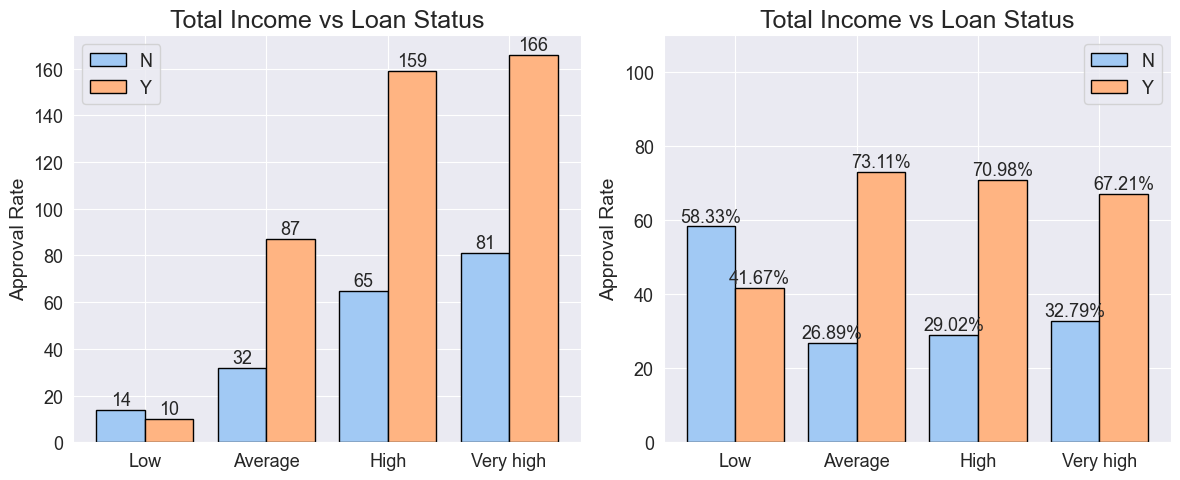

In [13]:
# Data
bins = [0,2500,4000,6000,81000]
label = ['Low','Average','High', 'Very high'] 
train['Total_Income_bin' ]= pd.cut(train['Total_Income'],bins,labels=label)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])

# Graph (values)
plt.figure(figsize =(12, 5))
plt.subplot(1, 2, 1)
groupped_bar(Total_Income_bin, "Total Income")

# Graph (percentages)
plt.subplot(1, 2, 2)
groupped_bar(Total_Income_bin, "Total Income", "p")

# Saving the images
plt.savefig('../images/10_total_income_comparison.png', dpi=300, bbox_inches='tight')

The proportion of loan approvals for applicants with low total income is significantly lower compared to those with average, high, and very high income levels. Next, let us visualise the loan amounts for this group of applicants.

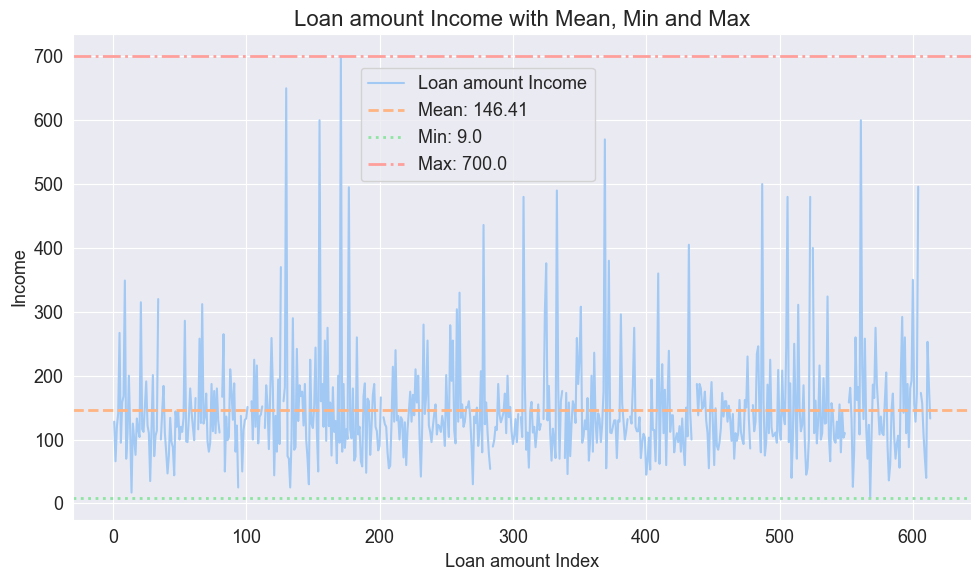

In [14]:
# Analysing loan amount:
avg_income('Loan amount', train['LoanAmount'])

# Move legend slightly up by changing the y-coordinate
plt.legend(loc='upper left', bbox_to_anchor=(0.31, 0.95)) 

# Saving the images
plt.savefig('../images/11_loanAmount_analysis.png', dpi=300, bbox_inches='tight')

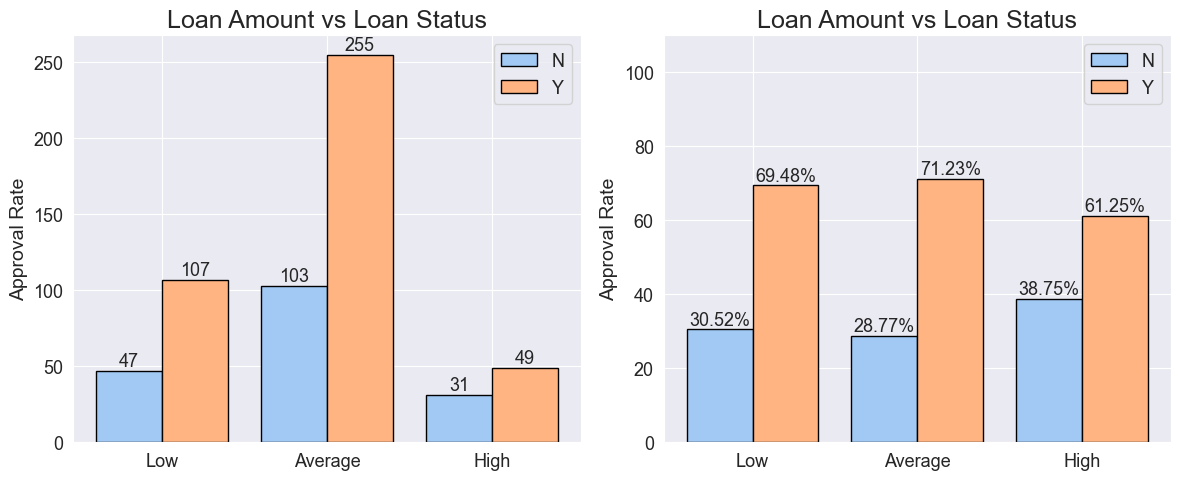

In [15]:
# Data
bins = [0,100,200,700] 
label = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels = label)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 

# Graph (values)
plt.figure(figsize =(12, 5))
plt.subplot(1, 2, 1)
groupped_bar(LoanAmount_bin, "Loan Amount")

# Graph (percentages)
plt.subplot(1, 2, 2)
groupped_bar(LoanAmount_bin, "Loan Amount", "p")

# Saving the images
plt.savefig('../images/12_loanAmount_analysis.png', dpi=300, bbox_inches='tight')

It is observed that the proportion of approved loans is higher for low and average loan amounts compared to high loan amounts. This finding supports the initial hypothesis that lower loan amounts are more likely to receive approval. 

## Correlation.

The following section examines the correlation among all variables included in the analysis, providing insight into the strength and direction of their relationships.

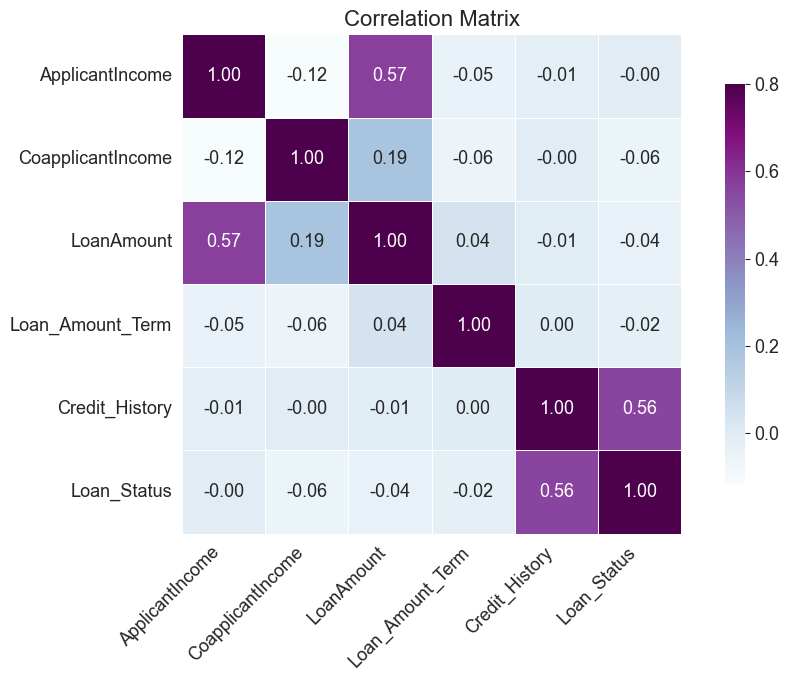

In [16]:
# Removing the created variables
train = train.drop(['Income_bin', 'Coapplicant_Income_bin','LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

# Removing strings
train['Dependents'] = train['Dependents'].replace('3+', 3)
test['Dependents'] = test['Dependents'].replace('3+', 3)
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0, 'Y': 1})


# Correlation matrix
matrix = train.corr(numeric_only=True)
correlation_matrix(matrix)

# Saving the images
plt.savefig('../images/13_correlation_matrix.png', dpi=300, bbox_inches='tight')

The analysis coming from the correlation matrix indicates that the most significant correlations are observed between ```ApplicantIncome``` and ```LoanAmount```, as well as between ```Credit_History``` and ```Loan_Status```. Additionally, LoanAmount shows a correlation with CoapplicantIncome. These findings suggest that, generally, the loan amount is closely associated with the income of the applicant or their household, which supports the hypothesis that income plays a key role in loan approval decisions.

# Missing Value, Data Types and Outlier Treatment

After thoroughly examining the dataset, the next step involves addressing missing values, correcting data types, and managing outliers. This is crucial, as the presence of missing data and outliers can significantly impact the performance and reliability of the model. Let’s list out the feature-wise count of missing values.

In [17]:
na_calculator(train)

NAMES  VALUE COUNT  PERCENTAGE (%) DATA TYPE
0      Credit_History           50            8.14   float64
1       Self_Employed           32            5.21    object
2          LoanAmount           22            3.58   float64
3          Dependents           15            2.44    object
4    Loan_Amount_Term           14            2.28   float64
5              Gender           13            2.12    object
6             Married            3            0.49    object
7           Education            0            0.00    object
8             Loan_ID            0            0.00    object
9   CoapplicantIncome            0            0.00   float64
10    ApplicantIncome            0            0.00     int64
11      Property_Area            0            0.00    object
12        Loan_Status            0            0.00     int64

There are missing values in ```Gender```, ```Married```, ```Dependents```, ```Self_Employed```, ```LoanAmount```, ```Loan_Amount_Term```, and ```Credit_History features```. To address these missing values, the following imputation methods are recommended:

- **For numerical variables**: imputation using mean or median.
- **For categorical variables**: Categorical imputation.
    
## Imputing missing data

In [18]:
imputing_missing_data(train)
imputing_missing_data(test)

## Training set

In [19]:
na_calculator(train)

NAMES  VALUE COUNT  PERCENTAGE (%) DATA TYPE
0             Loan_ID            0             0.0    object
1              Gender            0             0.0    object
2             Married            0             0.0    object
3          Dependents            0             0.0    object
4           Education            0             0.0    object
5       Self_Employed            0             0.0    object
6     ApplicantIncome            0             0.0     int64
7   CoapplicantIncome            0             0.0   float64
8          LoanAmount            0             0.0   float64
9    Loan_Amount_Term            0             0.0   float64
10     Credit_History            0             0.0   float64
11      Property_Area            0             0.0    object
12        Loan_Status            0             0.0     int64

## Testing set

In [20]:
na_calculator(test)

NAMES  VALUE COUNT  PERCENTAGE (%) DATA TYPE
0             Loan_ID            0             0.0    object
1              Gender            0             0.0    object
2             Married            0             0.0    object
3          Dependents            0             0.0    object
4           Education            0             0.0    object
5       Self_Employed            0             0.0    object
6     ApplicantIncome            0             0.0     int64
7   CoapplicantIncome            0             0.0     int64
8          LoanAmount            0             0.0   float64
9    Loan_Amount_Term            0             0.0   float64
10     Credit_History            0             0.0   float64
11      Property_Area            0             0.0    object

## Checking distribution

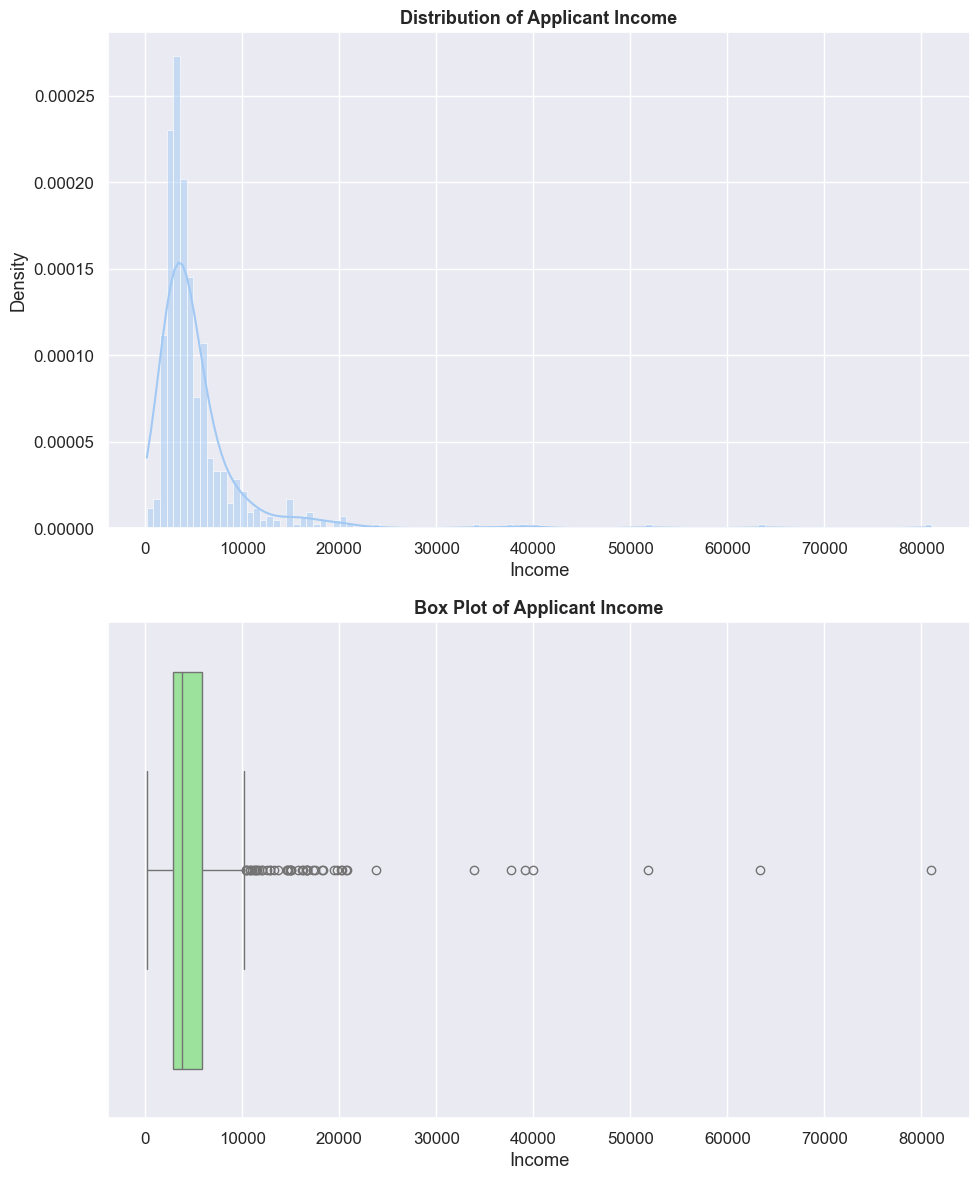

In [21]:
# Set Seaborn theme
sns.set(style="darkgrid", palette="pastel", font_scale=1.1)

# Create figure
plt.figure(figsize=(10, 12))

# Histogram with KDE
plt.subplot(2, 1, 1)
sns.histplot(train["ApplicantIncome"], kde=True, stat="density")

plt.title("Distribution of Applicant Income", fontsize=13, weight='bold')
plt.xlabel("Income")
plt.ylabel("Density")

# Box plot
plt.subplot(2, 1, 2)
sns.boxplot(x=train["ApplicantIncome"], color='lightgreen')
plt.title("Box Plot of Applicant Income", fontsize=13, weight='bold')
plt.xlabel("Income")

# Tight layout for better spacing
plt.tight_layout()

# Saving the images
plt.savefig('../images/14_applicant_income_distribution.png', dpi=300, bbox_inches='tight')

The presence of outliers and skewness is evident in the data. By applying a logarithmic transformation, the distribution becomes more closely aligned with a normal distribution. The effect of the log transformation is visualised below, with corresponding adjustments applied simultaneously to the test dataset.

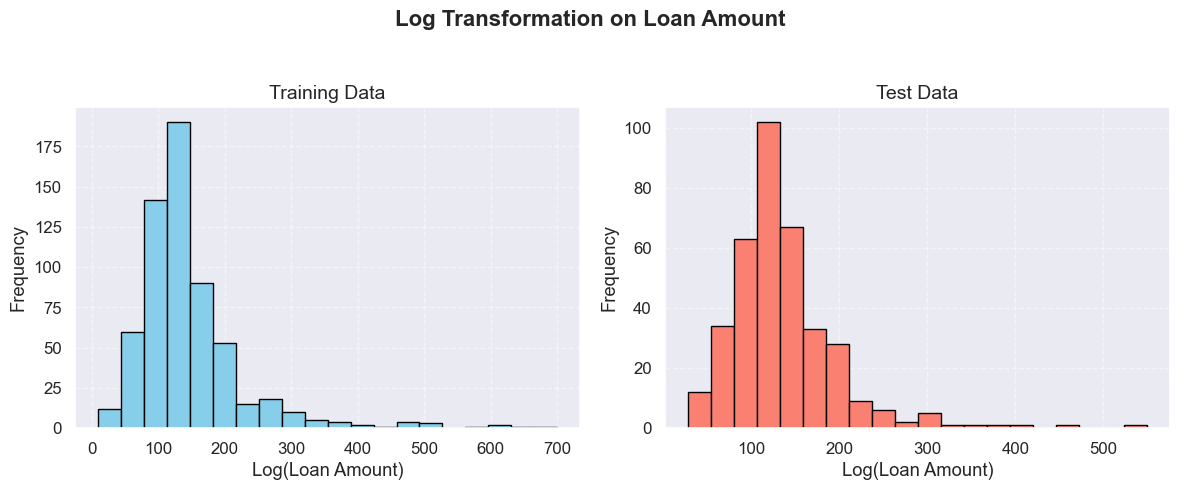

In [22]:
# Set figure size and style
plt.figure(figsize=(12, 5))
plt.suptitle('Log Transformation on Loan Amount', fontsize=16, fontweight='bold')

# Plot for training data
plt.subplot(1, 2, 1)
plt.hist(train['LoanAmount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Training Data', fontsize=14)
plt.xlabel('Log(Loan Amount)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

# Plot for test data
plt.subplot(1, 2, 2)
plt.hist(test['LoanAmount'], bins=20, color='salmon', edgecolor='black')
plt.title('Test Data', fontsize=14)
plt.xlabel('Log(Loan Amount)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

# Saving the images
plt.savefig('../images/15_applicant_income_distribution.png', dpi=300, bbox_inches='tight')

The distribution now appears substantially closer to normal, with the influence of extreme values significantly reduced. This will help to make better predictions in the training, testing and predicting phase.

# Modelling

The predictions will be completed with ```Logistic Regression```, ```Random Forest``` and ```XGBoost```, classification models commonly employed to predict binary outcomes ```(e.g., 1/0, Yes/No, True/False)``` based on a set of independent variables and work well with imbalanced data.  

As a preliminary data preparation step, the ```Loan_ID``` variable will be removed from both the training and test datasets, as it has no predictive value with respect to the target variable, ```Loan_Status```. 

Furthermore, the ```Dependents``` column contains numerical values represented as strings, resulting in mixed data types. To prevent errors during the machine learning phase, the column is explicitly converted to integers. Following this preprocessing step, the dataset is partitioned into features ```(X)``` and target ```(y)``` variables in preparation for model training.

The encoding process for the categorical features will be completed with ```(OneHotEncoder with handle_unknown='ignore')```. This process converts each category into a binary format (0 or 1), enabling quantitative analysis and facilitating comparison across distinct groups.

***Best Practice in ML workflow***: Perform Categorical Transformation After Splitting the Data. This is to avoid data leakage—information from the test set influencing the training process.

- Split the data first
- Fit the encoder on training data only
- Transform both sets

In [23]:
# Removing Loan_ID
train = train.drop("Loan_ID", axis = 1)
test = test.drop("Loan_ID", axis = 1)

# Parsing 'Dependent' column into integer
train["Dependents"] = train["Dependents"].astype(int)
test["Dependents"] = test["Dependents"].astype(int)

# Splitting into X & y
X = train.drop("Loan_Status", axis  = 1)
y = train["Loan_Status"]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Verifying categorical columns
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns

# Set up ColumnTransformer with OneHotEncoder
encoder = ColumnTransformer(transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"  # Keep numeric columns
                           )

# Fit only on training data
encoder.fit(X_train)

# Transform both train and test
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Training, testing and predicting

Best Models for Imbalanced Data are Tree-Based Models ```(Although there is no such thing as "Best models")```. The ones for this stage are: 

- ```Random Forest``` and ```XGBoost``` are generally robust to imbalance, especially when combined with class weighting or sampling strategies.
- ```XGBoost``` allows tuning of scale_pos_weight to help balance minority and majority classes.
- ```Logistic Regression``` (with class weights)

The training, testing and predictions are completed using a custom function that can be seen in the directories. The file is called ```data_handling.py```. The script will return performance table in percentages.


In [24]:
stage_resutls = train_test_pred(X_train_encoded, y_train, X_test_encoded, y_test)
stage_resutls

Logistic Regression Random Forest XGBoost Classifier
Accuracy              78.38%        76.22%             75.14%
F1 Score              85.51%        83.46%             82.58%

# Conclusions

After completing the training and testing phase, the following conclusions are achieved:

- Logistic Regression performed best overall, with the highest ```accuracy``` and ```F1 score```.
- All models showed similar performance, but Logistic Regression had a slight edge.
- Since F1 score is prioritised for imbalanced classification (as shown during the analysis), Logistic Regression is the most reliable choice in this scenario with a ```85.50%```.